In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

print(os.listdir("data"))
data=pd.read_csv('data/results.csv')

['results.csv']


In [2]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
12865,1983-11-25,Malawi,Uganda,1,2,CECAFA Cup,Nairobi,Kenya,True
19860,1996-09-07,Indonesia,Cambodia,3,0,AFF Championship,Singapore,Singapore,True
13246,1984-10-11,Ivory Coast,Liberia,3,0,Friendly,Abidjan,Ivory Coast,False
33700,2011-11-15,Italy,Uruguay,0,1,Friendly,Rome,Italy,False
32155,2010-06-18,Slovenia,United States,2,2,FIFA World Cup,Johannesburg,South Africa,True


In [4]:
data[['tournament']].describe()

,tournament
count,41640
unique,112
top,Friendly
freq,17029


In [5]:
data['total_scores'] = data['home_score'] + data['away_score']
# covert str to date time format
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_scores
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [7]:
data.groupby('tournament').agg('max')

,date,home_team,away_team,home_score,away_score,city,country,neutral,total_scores
tournament,,,,,,,,,
ABCS Tournament,2015-02-01,Suriname,Suriname,8,9,Willemstad,Suriname,True,11
AFC Asian Cup,2019-02-01,Yemen,Yemen DPR,8,7,Tripoli,Vietnam,True,9
AFC Asian Cup qualification,2018-03-27,Yemen,Yemen DPR,20,8,al-Wakrah,Yemen,True,20
AFC Challenge Cup,2016-11-15,Turkmenistan,Turkmenistan,11,6,New Delhi,Sri Lanka,True,11
AFC Challenge Cup qualification,2013-03-26,Turkmenistan,Turkmenistan,9,9,Vientiane,Sri Lanka,True,11
...,...,...,...,...,...,...,...,...,...
Viva World Cup,2012-06-09,Zanzibar,Zanzibar,21,18,Xewkija,Sweden,True,22
WAFF Championship,2014-01-07,Yemen,Yemen,7,4,al-Farwaniyah,Syria,True,8
West African Cup,1987-02-08,Togo,Togo,5,5,Ouagadougou,Liberia,True,10


In [19]:
friendlyMatch = data.loc[data['tournament'] == 'Friendly'].copy()

In [20]:
friendlyMatch.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_scores
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [24]:
# use year as x, total_scores as y, draw graph to display the trend 
# and also train a model using linear regression, then predict giving the year
friendlyMatch['year'] = friendlyMatch.date.dt.year

In [25]:
friendlyMatch.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_scores,year_total,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,NaN,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,NaN,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,NaN,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,NaN,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,NaN,1876


In [36]:
y = friendlyMatch.groupby(['year'])['total_scores'].sum()

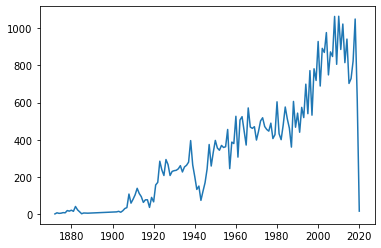

In [38]:
plt.plot(y)